### THEORY AND INTUITION

In [ ]:
# dimensionality reduction algo suc as PCA do not simply choose a subset of the existing features
# they create new dimensional coponents that are combinations of proportions of teh existing features

# PCA outcomes:
#     reduce number of dimensions
#     show which features explain the most variance in the data

# diemnsion reduction
# helps visualization and understand complex data sets
# can also act as a simpler data set for training data for machine learning
# reduce dimensions then train ML algo on samller data set

# variance in unsupervised explained
# measure the proportion to which each feature accounts for dispersion in the data set
# principal component is a linear combination of the original features
# the more variance the original feature accounts for, the more the influence it has ove the principal components
# the single principal component can explain some percentage of the original data for example 90%of the variance explained by teh principall component
# 100% of variance in the data is explained by the original features

In [1]:
#  linear transformation of the data
# the direction may change of the original point and the point which is transformed
# there is a special case of the vector where even after stretching due to the transforation the direction does not change, this is called eigenvector

# <PCA steps>
# get original data
# calculate covariance matix
# calculate eigenvectors
# sort eigen vectors by eigen values
# choose N largest eigen values
# project original data onto eigenvectors

### MANUAL IMPLEMENTATION OF PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_tumor_data_features.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# sns.heatmap(df)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X = scaler.fit_transform(df)

In [13]:
scaled_X.mean(axis = 0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

In [15]:
covariance_matrix = np.cov(scaled_X, rowvar=False)

In [16]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [24]:
# PCA 30 feature Space ----> 30 PC Space -----> 2
# how many principal components to choos? N=2

In [27]:
num_components = 2

In [32]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [36]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:,sorted_key]

In [38]:
# original data ---> project ---> eigen vectors
principal_components = np.dot(scaled_X, eigen_vectors)

In [39]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

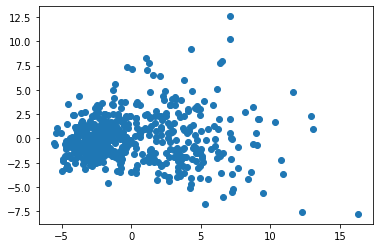

In [41]:
plt.scatter([principal_components[:,0]], principal_components[:,1])

In [42]:
 from sklearn.datasets import load_breast_cancer

In [43]:
cancer_dict = load_breast_cancer()

In [44]:
cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

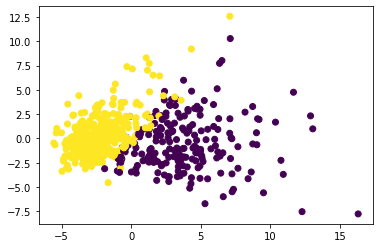

In [49]:
plt.scatter([principal_components[:,0]], principal_components[:,1], c=cancer_dict['target'])

### PCA SCIKIT LEARN

In [50]:
from sklearn.decomposition import PCA

In [52]:
# help(PCA)

In [53]:
pca_model = PCA(n_components=2)

In [56]:
pc_results = pca_model.fit_transform(scaled_X)

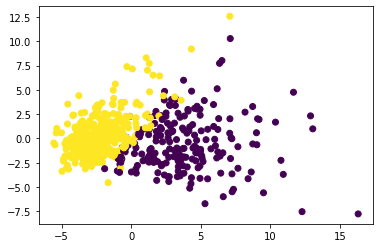

In [62]:
plt.scatter(pc_results[:,0],pc_results[:,1],c=cancer_dict['target'])

In [64]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [66]:
df_comp = pd.DataFrame(pca_model.components_,index=['PC1','PC2'],columns=df.columns)

In [68]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

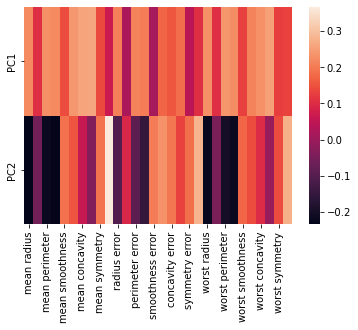

In [69]:
sns.heatmap(df_comp)

In [72]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155946

In [73]:
pca_30 = PCA(n_components=30)

In [74]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [76]:
np.sum(pca_30.explained_variance_ratio_)

1.0

In [85]:
exp_var = []

for n in range(1,30):
    
    pca = PCA(n_components = n)
    pca.fit(scaled_X)
    
    exp_var.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance explained')

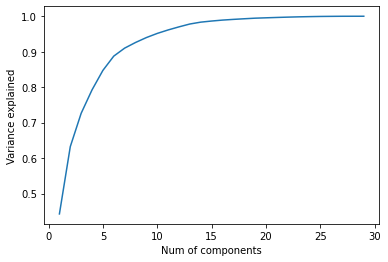

In [87]:
plt.plot(range(1,30), exp_var)
plt.xlabel('Num of components')
plt.ylabel('Variance explained')